Machine Learning Project : Bank-marketing (Classification)
=======

Problem statement
---------
   
The classification goal is to predict if the client will subscribe a term deposit (variable y).

Number of Instances: 45211 

Number of Attributes: 16 + output attribute.

Attribute information:

Input variables:

- 1 - age (numeric) 
- 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
- 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) 
- 4 - education (categorical: "unknown","secondary","primary","tertiary") 
- 5 - default: has credit in default? (binary: "yes","no") 
- 6 - balance: average yearly balance, in euros (numeric) 
- 7 - housing: has housing loan? (binary: "yes","no") 
- 8 - loan: has personal loan? (binary: "yes","no")
- 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
- 10 - day: last contact day of the month (numeric) 
- 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 
- 12 - duration: last contact duration, in seconds (numeric)
- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 
- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

- 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

Importing data
-----

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
# %matplotlib inline

In [2]:
df=pd.read_csv("bank-full.csv")
df_copy=df.copy()


#feature mapping for 'housing','default','loan','y'
binary_map = {'y':{'yes':1,'no':0},'housing':{'yes':1,'no':0}, 'loan':{'yes':1,'no':0}, 'default':{'yes':1,'no':0}, 'marital':{'single':1,'married':2,'divorced':3},'education':{'secondary':1,'tertiary':2,'unknown':0},'job':{'management':'working','technician':'working','entrepreneur':'working','blue-collar':'working','technician':'working','admin.':'working','services':'working','unknown':'working','self-employed':'working','student':'low income','unemployed':'low income','housemaid':'low income'}}

df.replace(binary_map, inplace=True)

feat_df=df.drop(columns=['y']) #dataframe containing only features
target=df['y']  #contains only target variable


In [83]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,working,2,2,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,working,1,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,working,2,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,working,2,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,working,1,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,working,2,2,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,working,1,2,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
7,42,working,3,2,1,2,1,0,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,2,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,working,1,1,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0


Visualizing and cleaning the data
----

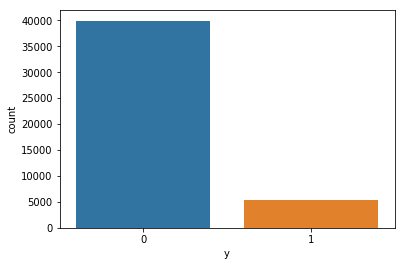

In [55]:
sns.countplot(df['y'], label="Count")


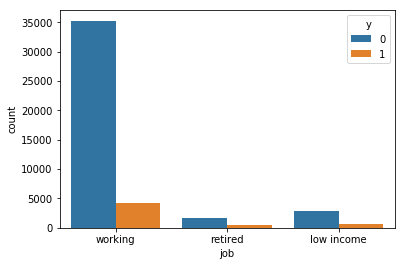

In [64]:
sns.countplot(df['job'], hue=df['y'])

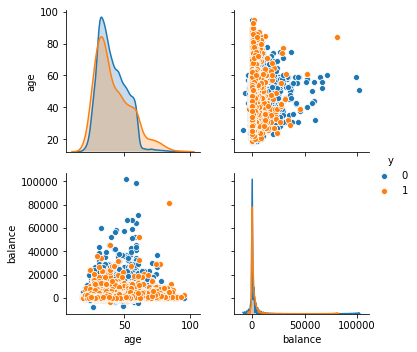

In [73]:
#sns.pairplot(df, hue = 'y', vars = ['housing', 'default', 'balance'] )
sns.pairplot(df, hue='y', vars=['age','balance'])

In [3]:
for col_names in df.columns:
    if df[col_names].dtype=='object':
        unique_categories=len(df[col_names].unique())
        print("Feature '{col_names}' has {unique_categories} unique categories".format(col_names=col_names,unique_categories=unique_categories))
       
    #else:
        #df=df.drop(df.columns[col_names],axis=1)
        

Feature 'job' has 3 unique categories
Feature 'education' has 4 unique categories
Feature 'contact' has 3 unique categories
Feature 'month' has 12 unique categories
Feature 'poutcome' has 4 unique categories


In [87]:
df['job'].unique()

array(['working', 'retired', 'low income'], dtype=object)

In [27]:
#making a list of headings to by dummied

num_df = df.copy().drop(columns = ['age', 'balance', 'day',
                                           'duration', 'campaign','pdays','previous','housing','default','loan','marital','y','month'])
dummy_list=num_df.columns
num_df.head()
df_numerical=df.copy().filter(['age', 'balance', 'day','duration', 'campaign','pdays','previous','housing','default','loan','marital','y'])
df_numerical2=df_numerical.drop(columns=['y'])

num_df



,job,education,contact,poutcome
0,working,2,unknown,unknown
1,working,1,unknown,unknown
2,working,1,unknown,unknown
3,working,0,unknown,unknown
4,working,0,unknown,unknown
5,working,2,unknown,unknown
6,working,2,unknown,unknown
7,working,2,unknown,unknown
8,retired,primary,unknown,unknown
9,working,1,unknown,unknown


In [28]:
#function to create dummy variables
def dum(df,dummy_list):
   for i in dummy_list:
        dummies=pd.get_dummies(df[i], prefix=i, dummy_na=False)
        df=df.drop(i,1)
        df=pd.concat([df,dummies],axis=1)
   return df     

In [30]:
df2=dum(num_df,dummy_list)
df2.head()

,job_low income,job_retired,job_working,education_0,education_1,education_2,education_primary,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,0,0,1,1,0,0,0,0,0,1,0,0,0,1
4,0,0,1,1,0,0,0,0,0,1,0,0,0,1


In [31]:
new_df=pd.concat([df2,df_numerical2],axis=1) #putting all the features together
new_df.head(5)

,job_low income,job_retired,job_working,education_0,education_1,education_2,education_primary,contact_cellular,contact_telephone,contact_unknown,...,balance,day,duration,campaign,pdays,previous,housing,default,loan,marital
0,0,0,1,0,0,1,0,0,0,1,...,2143,5,261,1,-1,0,1,0,0,2
1,0,0,1,0,1,0,0,0,0,1,...,29,5,151,1,-1,0,1,0,0,1
2,0,0,1,0,1,0,0,0,0,1,...,2,5,76,1,-1,0,1,0,1,2
3,0,0,1,1,0,0,0,0,0,1,...,1506,5,92,1,-1,0,1,0,0,2
4,0,0,1,1,0,0,0,0,0,1,...,1,5,198,1,-1,0,0,0,0,1


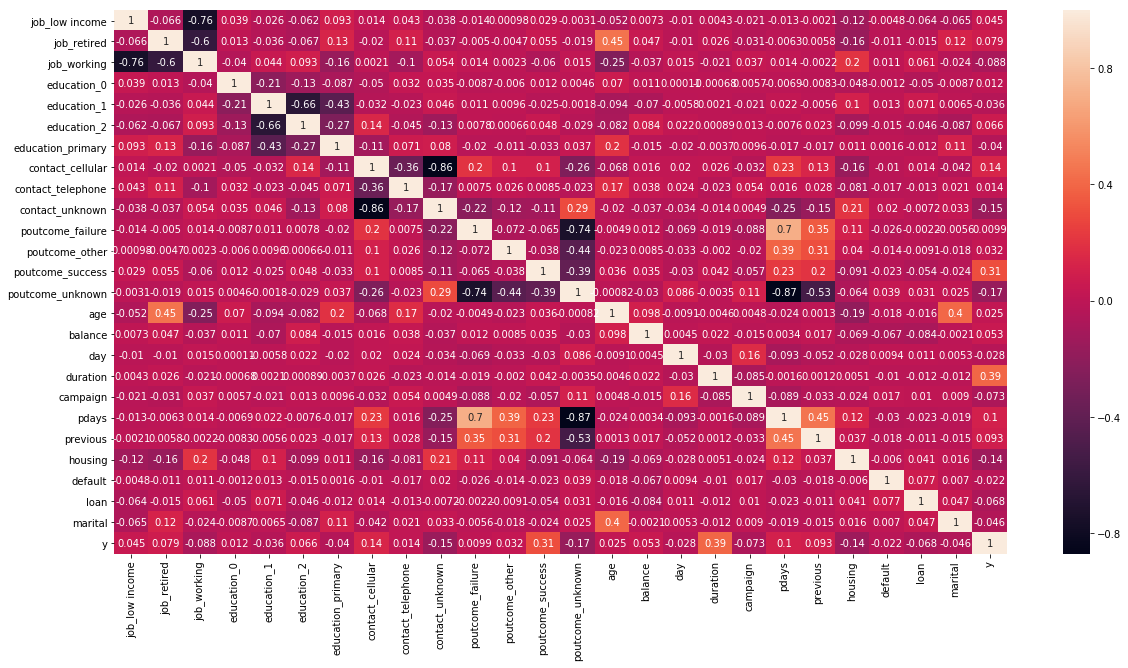

In [32]:
# Let's check the correlation between the variables 
new_df2=pd.concat([df2,df_numerical],axis=1) #putting all the features together
plt.figure(figsize=(20,10)) 
sns.heatmap(new_df2.corr(), annot=True) 

In [46]:
X=new_df2
y=target
X

,job_low income,job_retired,job_working,education_0,education_1,education_2,education_primary,contact_cellular,contact_telephone,contact_unknown,...,day,duration,campaign,pdays,previous,housing,default,loan,marital,y
0,0,0,1,0,0,1,0,0,0,1,...,5,261,1,-1,0,1,0,0,2,0
1,0,0,1,0,1,0,0,0,0,1,...,5,151,1,-1,0,1,0,0,1,0
2,0,0,1,0,1,0,0,0,0,1,...,5,76,1,-1,0,1,0,1,2,0
3,0,0,1,1,0,0,0,0,0,1,...,5,92,1,-1,0,1,0,0,2,0
4,0,0,1,1,0,0,0,0,0,1,...,5,198,1,-1,0,0,0,0,1,0
5,0,0,1,0,0,1,0,0,0,1,...,5,139,1,-1,0,1,0,0,2,0
6,0,0,1,0,0,1,0,0,0,1,...,5,217,1,-1,0,1,0,1,1,0
7,0,0,1,0,0,1,0,0,0,1,...,5,380,1,-1,0,1,1,0,3,0
8,0,1,0,0,0,0,1,0,0,1,...,5,50,1,-1,0,1,0,0,2,0
9,0,0,1,0,1,0,0,0,0,1,...,5,55,1,-1,0,1,0,0,1,0


Model Training
----



In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=5)
min_train = X_train.min()
min_train

job_low income          0
job_retired             0
job_working             0
education_0             0
education_1             0
education_2             0
education_primary       0
contact_cellular        0
contact_telephone       0
contact_unknown         0
poutcome_failure        0
poutcome_other          0
poutcome_success        0
poutcome_unknown        0
age                    18
balance             -8019
day                     1
duration                0
campaign                1
pdays                  -1
previous                0
housing                 0
default                 0
loan                    0
marital                 1
y                       0
dtype: int64

In [48]:
range_train = (X_train - min_train).max()
range_train

job_low income            1
job_retired               1
job_working               1
education_0               1
education_1               1
education_2               1
education_primary         1
contact_cellular          1
contact_telephone         1
contact_unknown           1
poutcome_failure          1
poutcome_other            1
poutcome_success          1
poutcome_unknown          1
age                      77
balance              110146
day                      30
duration               4918
campaign                 62
pdays                   872
previous                275
housing                   1
default                   1
loan                      1
marital                   2
y                         1
dtype: int64

In [49]:

X_train_scaled = (X_train - min_train)/range_train

In [50]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [54]:
#Using Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logreg= LogisticRegression()
logreg.fit(X_train_scaled,y_train)
pred=logreg.predict(X_test_scaled)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


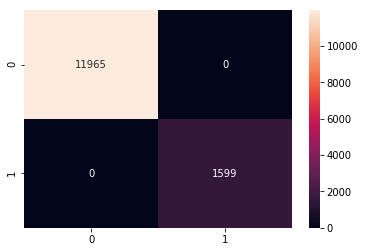

In [52]:
#Creating Confusion matrix
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm,annot=True,fmt="d")

In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11965
           1       1.00      1.00      1.00      1599

   micro avg       1.00      1.00      1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564

